In [1]:
from portfolio_optimization.data_processing import *
from portfolio_optimization.data_collection import *
from datetime import datetime, timezone, timedelta
from tokens.get_assets import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, plotting

In [2]:
asset_list = get_tickers()
_df = get_historical_prices_for_assets(asset_list['high_risk_tickers'], time_range=timedelta(days=365 * 3), interested_columns=["ReferenceRate", "CapMrktEstUSD"])

# Filter out all columns containing `_` in their name
df = _df.loc[:, ~_df.columns.str.contains("_")]

# Get all the market caps
mcaps = _df.loc[:, _df.columns.str.contains("CapMrktEstUSD")]
mcaps.columns = mcaps.columns.str.replace("_CapMrktEstUSD", "")
mcaps.replace(np.nan, 0, inplace=True)
# Print comprehensive statistical summary
df

High risk tickers: 14
Medium risk tickers: 60
Low risk tickers: 8


/var/folders/d2/1qh2h9ys19z3375prb_0cb8w0000gn/T/ipykernel_67609/3080830945.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mcaps.replace(np.nan, 0, inplace=True)


,aave,ada,avax,btc,cake,dot,eth,link,matic,sol,uni,bnb,wbtc
2020-07-20,NaN,0.124229,NaN,9218.842311,NaN,NaN,239.358146,8.081399,0.021281,0.923665,NaN,18.029131,9388.378291
2020-07-21,NaN,0.117977,NaN,9167.190568,NaN,NaN,236.361256,7.274300,0.021755,0.873413,NaN,17.545356,9425.893169
2020-07-22,NaN,0.123055,NaN,9388.574350,NaN,NaN,245.250595,7.297541,0.021265,0.977347,NaN,17.742509,11268.006679
2020-07-23,NaN,0.124206,NaN,9531.257430,NaN,NaN,264.199169,7.485817,0.021206,1.041784,NaN,18.018131,11268.006679
2020-07-24,NaN,0.124161,NaN,9609.166715,NaN,NaN,275.223813,7.895025,0.021143,1.057659,NaN,18.714059,10016.670061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-16,78.923740,0.325887,14.820432,30290.890596,1.541389,5.426049,1930.717785,6.915486,0.798559,27.395074,5.797465,251.135605,30291.136216
2023-07-17,76.798893,0.314830,14.285089,30249.772966,1.506001,5.308692,1924.546247,6.615660,0.769067,27.369360,5.722638,243.016990,30258.854090
2023-07-18,75.178325,0.312459,14.418348,30143.746274,1.548822,5.298416,1912.286380,7.206463,0.778827,26.870350,5.917777,244.155672,30143.746274
2023-07-19,72.019897,0.306693,13.774274,29835.747408,1.509685,5.177132,1897.399071,6.922395,0.737421,25.506394,5.893603,240.082671,29857.411175


,aave,ada,avax,btc,cake,dot,eth,link,matic,sol,uni,bnb,wbtc
aave,1.000000,0.801299,0.330689,0.823072,0.923674,0.864420,0.586910,0.935713,0.216306,0.340938,0.953679,0.462251,0.823090
ada,0.801299,1.000000,0.580950,0.825520,0.848180,0.852745,0.838438,0.775243,0.613089,0.723064,0.831287,0.725492,0.825622
avax,0.330689,0.580950,1.000000,0.661932,0.301132,0.625495,0.828551,0.410891,0.736287,0.890439,0.342243,0.712173,0.661920
btc,0.823072,0.825520,0.661932,1.000000,0.775975,0.936932,0.846529,0.813552,0.512981,0.668610,0.838471,0.733781,0.999907
cake,0.923674,0.848180,0.301132,0.775975,1.000000,0.830873,0.648185,0.933188,0.246401,0.407851,0.939702,0.714653,0.775857
dot,0.864420,0.852745,0.625495,0.936932,0.830873,1.000000,0.774502,0.910102,0.423699,0.669922,0.894637,0.664495,0.937112
eth,0.586910,0.838438,0.828551,0.846529,0.648185,0.774502,1.000000,0.593206,0.838564,0.874682,0.629506,0.908684,0.846152
link,0.935713,0.775243,0.410891,0.813552,0.933188,0.910102,0.593206,1.000000,0.238050,0.439343,0.935338,0.468356,0.814383
matic,0.216306,0.613089,0.736287,0.512981,0.246401,0.423699,0.838564,0.238050,1.000000,0.763339,0.287509,0.837583,0.512155
sol,0.340938,0.723064,0.890439,0.668610,0.407851,0.669922,0.874682,0.439343,0.763339,1.000000,0.392693,0.740910,0.668726


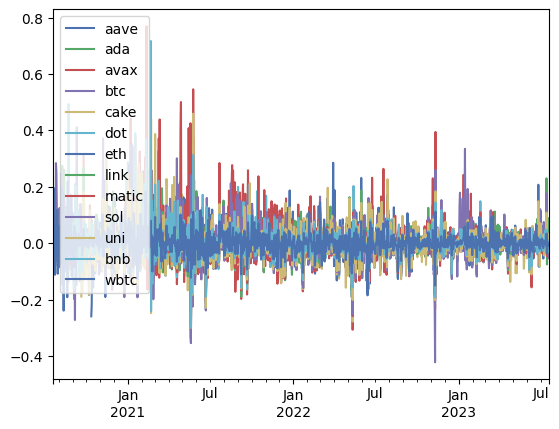

In [3]:
# this will give you the percentage change
df_percentage_variation = df.pct_change()

# plot variation of each asset's price
df_percentage_variation.plot()
pd.DataFrame(df).corr()

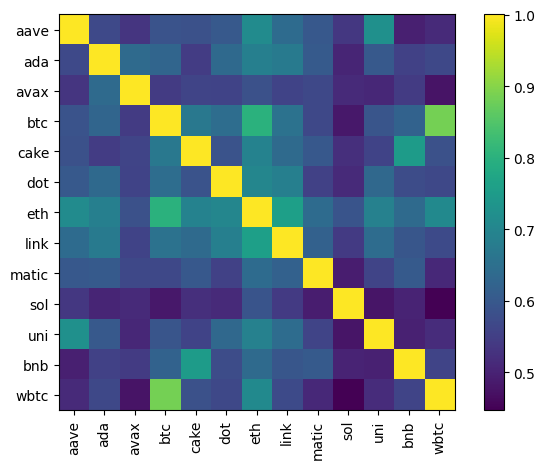

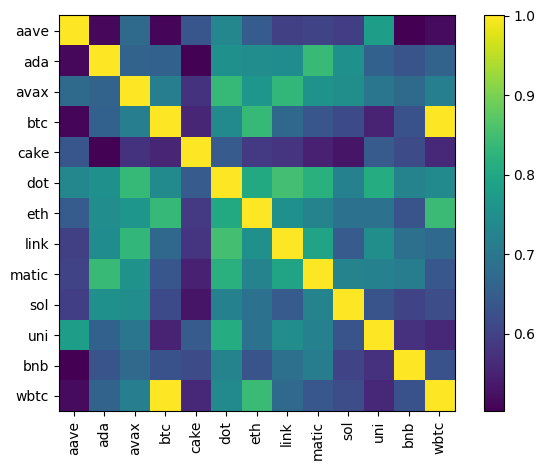

In [4]:
past_df, future_df = df.iloc[:-100], df.iloc[-100:]
future_cov = risk_models.sample_cov(future_df)
sample_cov = risk_models.sample_cov(past_df)

plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

In [5]:
rets = expected_returns(df)
rets.tail()

,aave,ada,avax,btc,cake,dot,eth,link,matic,sol,uni,bnb,wbtc
2023-07-16,-0.026166,-0.008205,0.014730,-0.000653,-0.007426,-0.003540,-0.002284,-0.002753,-0.012299,0.026051,-0.008906,0.013656,-0.000554
2023-07-17,-0.026923,-0.033928,-0.036122,-0.001357,-0.022958,-0.021628,-0.003196,-0.043356,-0.036932,-0.000939,-0.012907,-0.032328,-0.001066
2023-07-18,-0.021101,-0.007530,0.009329,-0.003505,0.028434,-0.001936,-0.006370,0.089304,0.012690,-0.018232,0.034099,0.004686,-0.003804
2023-07-19,-0.042012,-0.018456,-0.044670,-0.010218,-0.025269,-0.022891,-0.007785,-0.039419,-0.053164,-0.050761,-0.004085,-0.016682,-0.009499
2023-07-20,-0.003851,0.053785,0.016517,0.002590,0.004108,0.003642,-0.004155,-0.001351,0.010089,0.034707,-0.002700,0.004531,0.001821


In [6]:
# exp_cov = risk_models.exp_cov(past_df)
# plotting.plot_covariance(exp_cov, plot_correlation=True)
# plotting.plot_covariance(future_cov, plot_correlation=True)
# plt.show()

Optimization
================

aave     0.573994
ada      0.615969
avax     0.766088
btc      0.465362
cake     0.256641
dot      0.623989
eth      0.634160
link     0.607393
matic    0.989929
sol      0.966464
uni      0.543110
bnb      0.651166
wbtc     0.475739
dtype: float64            aave       ada      avax       btc      cake       dot       eth  \
aave   1.034657  0.465794  0.593166  0.306691  0.441045  0.563147  0.496908   
ada    0.465794  0.746951  0.585103  0.291917  0.331540  0.509823  0.424825   
avax   0.593166  0.585103  1.257567  0.320205  0.459479  0.583787  0.455400   
btc    0.306691  0.291917  0.320205  0.310969  0.259215  0.330048  0.316560   
cake   0.441045  0.331540  0.459479  0.259215  0.668993  0.406976  0.356253   
dot    0.563147  0.509823  0.583787  0.330048  0.406976  0.929506  0.476973   
eth    0.496908  0.424825  0.455400  0.316560  0.356253  0.476973  0.540192   
link   0.572277  0.536645  0.563105  0.332353  0.423327  0.602637  0.512244   
matic  0.684900  0.618005  0.727531  0.3

/Users/arguiot/Developer/Pyratz/portfolio/env/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/env/lib/python3.11/site-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/optimization/black_litterman.py:150: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


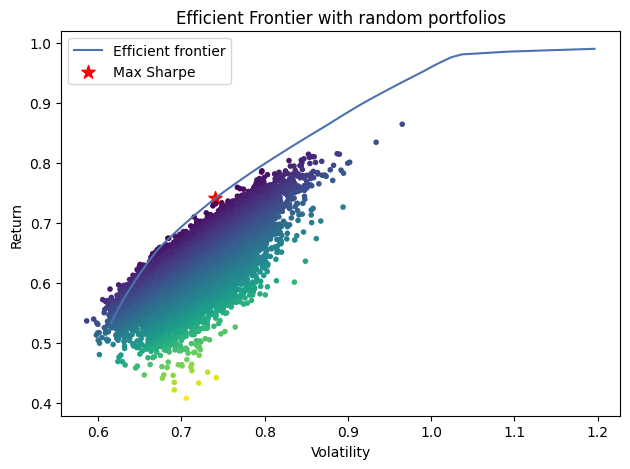

1.2004968211299235e-05
0.46391725035260223
0.00023142845726060776
9.592697754054056e-10
0.0032815466487519335
0.0013201248643237595
1.773554152540147e-07
0.002194306605438543
0.5267958854237794
6.106744039560149e-05
0.0021780894856735836
8.116477714755105e-06
9.611633199999511e-10


In [7]:
from portfolio_optimization.optimization.hrp import HRPOptimization
from portfolio_optimization.optimization.markowitz import Markowitz
from portfolio_optimization.optimization.black_litterman import BlackLitterman
from portfolio_optimization.optimization.heuristic import RiskParity, Heuristic

hrp = HRPOptimization(df, rets=rets)
hrp_weights = hrp.get_weights()

markowitz = Markowitz(df)
markowitz_weights = markowitz.get_weights()

last_mcaps = mcaps.iloc[-2]

bl = BlackLitterman(df, mcaps=last_mcaps)
bl_weights = bl.get_weights()
bl.plot_frontier()

rp = RiskParity(df)
rp_weights = rp.get_weights()

heuristic = Heuristic(df)
heuristic_weights = heuristic.get_weights()

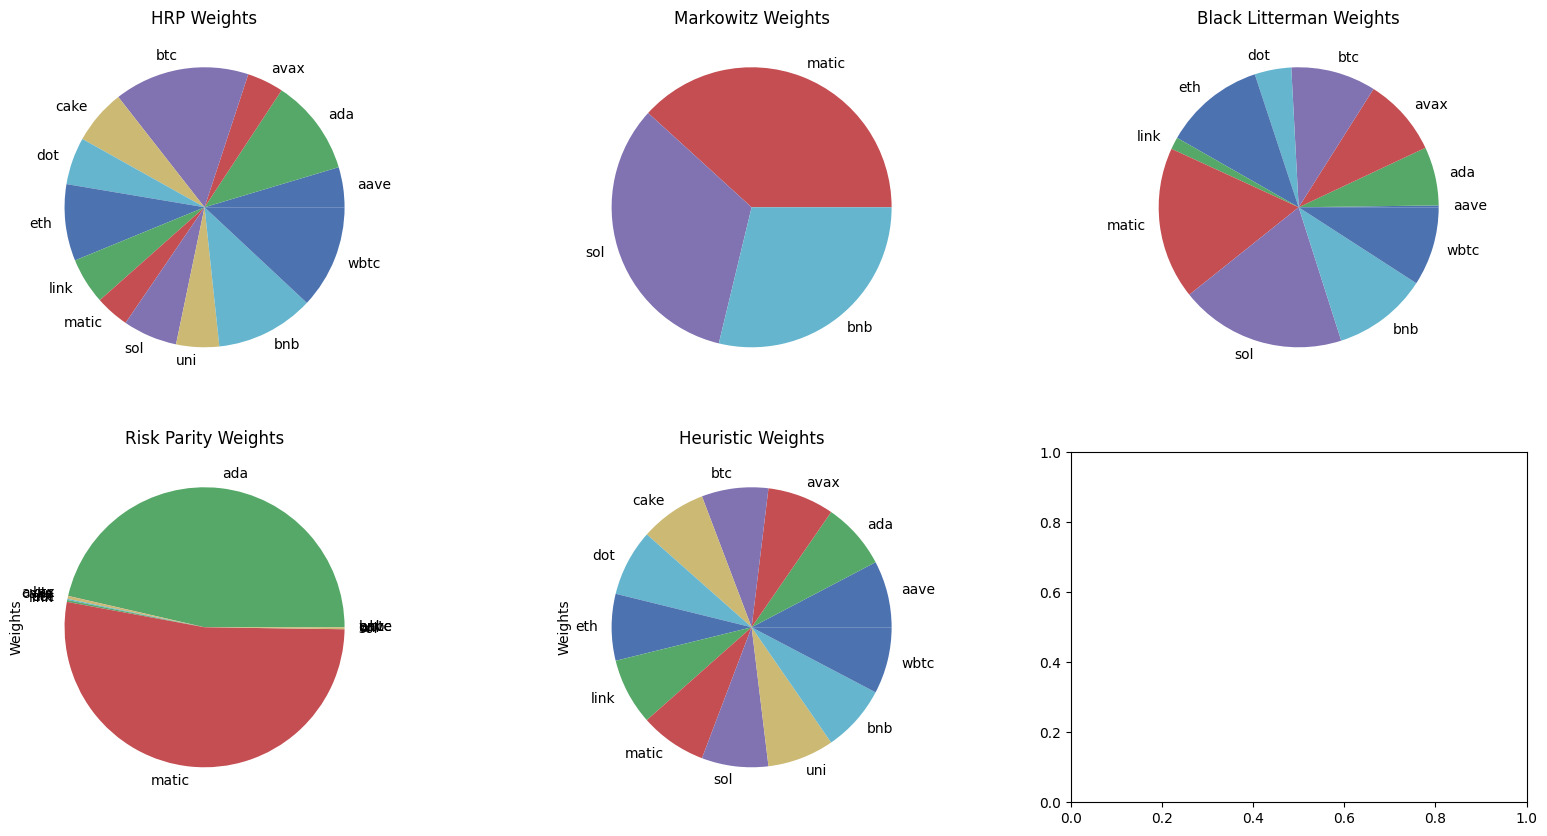

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

pd.Series(hrp_weights).plot.pie(ax=axs[0][0]);
axs[0][0].set_title('HRP Weights')

pd.Series(markowitz_weights).plot.pie(ax=axs[0][1]);
axs[0][1].set_title('Markowitz Weights')

pd.Series(bl_weights).plot.pie(ax=axs[0][2]);
axs[0][2].set_title('Black Litterman Weights')

pd.Series(rp_weights).plot.pie(ax=axs[1][0]);
axs[1][0].set_title('Risk Parity Weights')

pd.Series(heuristic_weights).plot.pie(ax=axs[1][1]);
axs[1][1].set_title('Heuristic Weights')

plt.show()

/Users/arguiot/Developer/Pyratz/portfolio/portfolio_optimization/optimization/markowitz.py:125: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


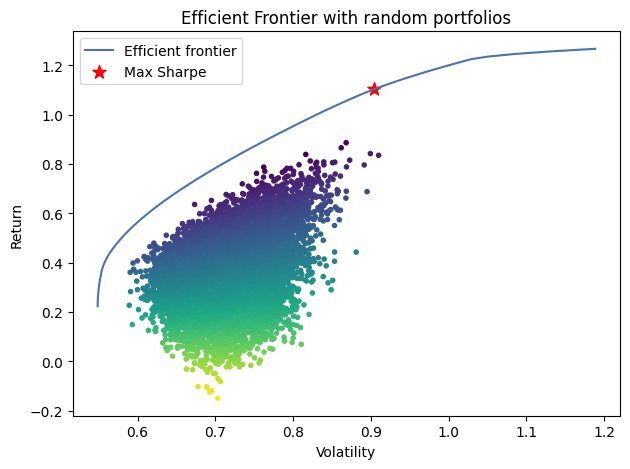

In [9]:
markowitz.plot_frontier()

In [10]:
from portfolio_optimization.portfolio import weight_diff

diffs = weight_diff(markowitz_weights, hrp_weights, threshold=0.05)
print(len(diffs))
diffs

7


[('btc', 'Buy', 0.09952528116736228),
 ('bnb', 'Sell', 0.11096950966960845),
 ('matic', 'Sell', 0.21873387071080386),
 ('sol', 'Sell', 0.1702934335871539),
 ('ada', 'Buy', 0.07076815241979163),
 ('wbtc', 'Buy', 0.07622263994647466),
 ('eth', 'Buy', 0.056360913754102016)]

The condensed distance matrix must contain only finite values.
No rebalance performed.
The condensed distance matrix must contain only finite values.
No rebalance performed.
at least one of the assets must have an expected return exceeding the risk-free rate
No rebalance performed.
at least one of the assets must have an expected return exceeding the risk-free rate
No rebalance performed.
at least one of the assets must have an expected return exceeding the risk-free rate
No rebalance performed.
at least one of the assets must have an expected return exceeding the risk-free rate
No rebalance performed.
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
No rebalance performed.
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
No rebalance performed.
The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
No rebalance performed.
The truth value of a Dat

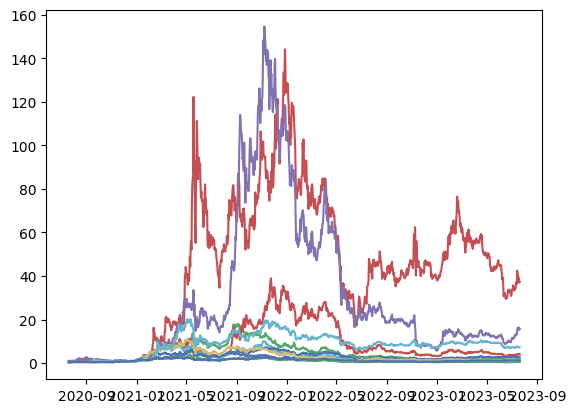

In [11]:
from portfolio_optimization.portfolio.Portfolio import Portfolio
from portfolio_optimization.backtesting.Backtesting import Backtest
from dateutil.relativedelta import relativedelta

start_date_portfolio = df.index[0] + relativedelta(months=5)

porfolio_hrp = Portfolio(
    weights=hrp_weights,
    base_value=100,
    initial_prices=df.loc[start_date_portfolio],
    optimiser=HRPOptimization,
)

portfolio_markowitz = Portfolio(
    weights=markowitz_weights,
    base_value=100,
    initial_prices=df.loc[start_date_portfolio],
    optimiser=Markowitz,
)

portfolio_bl = Portfolio(
    weights=bl_weights,
    base_value=100,
    initial_prices=df.loc[start_date_portfolio],
    optimiser=BlackLitterman,
)

portfolio_parity = Portfolio(
    weights=rp_weights,
    base_value=100,
    initial_prices=df.loc[start_date_portfolio],
    optimiser=RiskParity,
)

portfolio_default = Portfolio(
    weights=heuristic_weights,
    base_value=100,
    initial_prices=df.loc[start_date_portfolio],
    optimiser=Heuristic,
)

backtest = Backtest(
    portfolios={
        "HRP": porfolio_hrp,
        "Markowitz": portfolio_markowitz,
        "BL": portfolio_bl,
        "Risk Parity": portfolio_parity,
        "Heuristic": portfolio_default,
    },
    start_date=start_date_portfolio,
    end_date=df.index[-1],
    rebalance_frequency="2M",
    data=df,
    mcaps=mcaps,
)

perfs = backtest.run_backtest(look_back_period=5)

# Plot portfolio value over time using matplotlib
import matplotlib.pyplot as plt

df_normalized = df / df.loc[start_date_portfolio]
plt.plot(df_normalized)


In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import GridBox 

# Calculate the first date of the portfolio. The start date is the minimum date of the portfolio_value DataFrame within the `perfs` object. So we just reduce the perfs object to the portfolio_value DataFrame, and then get the minimum date.
start_date_portfolio = min(performance.portfolio_value['Portfolio Value'].index.min() for performance in perfs)


# Normalize prices of each asset at the start date of the portfolio
df_normalized = df / df.loc[start_date_portfolio]

# Calculate the daily equal-weighted return  
# df['equal_weighted'] = df_normalized.mean(axis=1)

# Normalize our portfolio and equally-weighted series to 100 at the start date of the portfolio
portfolio_normalized = pd.concat({performance.name: performance.portfolio_value['Portfolio Value'].loc[start_date_portfolio:] for performance in perfs}, axis=1)

# convert the index to a list of dates, which will be used for the Slider
_dates = [date for performance in perfs for date in performance.portfolio_value['Portfolio Value'].index]
dates = list(dict.fromkeys(_dates))
_rebalance_dates = [rebalance_date for performance in perfs for rebalance_date in performance.rebalance_dates if rebalance_date >= start_date_portfolio]
rebalance_dates = list(dict.fromkeys(_rebalance_dates))

In [13]:
# create a function to update the chart
def update(rebalance_date_index, main_portfolio=0):
    clear_output(wait=True)
        
    selected_date = rebalance_dates[rebalance_date_index]
    
    # Adjust the date_index to the closest rebalance date
    date_index = dates.index(selected_date)
    
    fig = plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(2, 2)

    ax1 = plt.subplot(gs[1, 0]) # for you normalized performance comparison
    ax3 = plt.subplot(gs[0, 0]) # put the ax1 graph below
    ax4 = plt.subplot(gs[:, 1]) # add a new bar graph showing the backtest.portfolio_holdings on the left of ax2
    ax2 = plt.subplot(gs[0, 1]) # for your pie chart of portfolio composition

    # plot portfolio values on ax1
    portfolio_names = list(p.name for p in perfs)
    ax1.plot(portfolio_normalized.index, portfolio_normalized, label=portfolio_names)
    
    for rebalance_date in rebalance_dates:
        if rebalance_date >= start_date_portfolio:
            ax1.axvline(x=rebalance_date, color='gray', linestyle='--')  

    ax1.axvline(x=selected_date, color='blue', linestyle='-')  # the selected date bar

    ax1.set_xlabel("Date")
    ax1.set_ylabel("Normalized Value")
    ax1.legend()
    ax1.set_title("Performance comparison (selected blue line)")

    # create portfolio composition pie chart on ax2
    selected = perfs[main_portfolio].portfolio_compositions.iloc[rebalance_date_index]
    # filter out rows where value is 0
    selected = selected[selected != 0]

    labels = selected.keys().tolist()
    sizes = selected.tolist()

    ax2.pie(sizes, labels=labels)
    ax2.set_title(str(dates[date_index]))

    portfolio_value = perfs[main_portfolio].portfolio_holdings.iloc[rebalance_date_index] * df.loc[selected_date]


    # plot portfolio_value instead of portfolio_holdings
    portfolio_value.plot(ax=ax3, kind='bar')
    ax3.set_title('Portfolio Value in Dollars')

    plt.show()

# create a slider for dates
date_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(rebalance_dates)-1 if len(rebalance_dates) > 0 else 0,
    step=1,
    description='Date Index:',
    continuous_update=True
)

pf_index = widgets.Dropdown(
    options=[(p.name, i) for i, p in enumerate(perfs)],
    value=0,
    description='Portfolio:',
    disabled=False,
)


# link the date_slider to the update function
widgets.interactive(update, rebalance_date_index=date_slider, main_portfolio=pf_index)

interactive(children=(IntSlider(value=0, description='Date Index:', max=15), Dropdown(description='Portfolio:'…

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 2000x1000 with 3 Axes>

posx and posy should be finite values
posx and posy should be finite values


ValueError: need at least one array to concatenate

<Figure size 2000x1000 with 3 Axes>